In [74]:
# import required modules
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# define path and PandaFrame
file_path = "/Users/MimounB/Desktop/Projects/ImmoWebDataMiner/DataAnalysis/immo_all.csv"

df = pd.read_csv(file_path)

#df.head()

In [75]:
# How many rows
print(df.shape[0])
# How many cols 
print(df.shape[1])

78348
32


In [76]:
# Remove unnecesarry columns ["link", "public_sales", "notary_sales""]
cleaned_data = df.drop(columns=["link", "Unnamed: 0"])

# Adapts price for chart
cleaned_data["price"] = cleaned_data["price"]

cleaned_data.head(n=10)

,locality,construction_year,Number_of_frontages,province,zip_code,price,property_type,subproperty_type,bedroom_count,total_area_m2,...,state_building,epc,primaryEnergyConsumptionPerSqm,heating_Type,Double_Glazing,cadastral_income,latitude,longitude,epc_n,state_building_n
0,Brugge,2013.0,NaN,West Flanders,8000,449000.0,APARTMENT,APARTMENT,3.0,129.0,...,GOOD,B,157.0,NaN,1,0.0,51.224569,3.193698,4.0,3.0
1,Brugge,2004.0,NaN,West Flanders,8000,865000.0,APARTMENT,PENTHOUSE,2.0,198.0,...,GOOD,B,106.0,NaN,1,1675.0,51.216909,3.206984,4.0,3.0
2,Brugge,2027.0,NaN,West Flanders,8000,471500.0,APARTMENT,APARTMENT,2.0,105.0,...,NaN,NaN,NaN,NaN,1,0.0,51.218103,3.210958,NaN,NaN
3,Brugge,1950.0,2.0,West Flanders,8000,315000.0,APARTMENT,APARTMENT,2.0,82.0,...,GOOD,B,121.0,GAS,1,0.0,51.220976,3.216877,4.0,3.0
4,Brugge,1965.0,NaN,West Flanders,8000,549000.0,APARTMENT,APARTMENT,2.0,138.0,...,NaN,B,135.0,GAS,1,971.0,51.210416,3.214247,4.0,NaN
5,Brugge,2021.0,NaN,West Flanders,8000,286855.0,APARTMENT,APARTMENT,2.0,88.0,...,NaN,NaN,0.0,NaN,1,0.0,NaN,NaN,NaN,NaN
6,Brugge,1989.0,NaN,West Flanders,8000,259000.0,APARTMENT,APARTMENT,2.0,96.0,...,GOOD,E,440.0,ELECTRIC,1,1232.0,51.212230,3.205020,7.0,3.0
7,Brugge,1990.0,2.0,West Flanders,8000,755000.0,APARTMENT,APARTMENT,0.0,273.0,...,GOOD,C,232.0,GAS,1,0.0,51.200249,3.227382,5.0,3.0
8,Brugge,2021.0,NaN,West Flanders,8000,280613.0,APARTMENT,APARTMENT,2.0,90.0,...,NaN,NaN,0.0,NaN,1,0.0,NaN,NaN,NaN,NaN
9,Brugge,2023.0,NaN,West Flanders,8000,365000.0,APARTMENT,APARTMENT,2.0,84.0,...,GOOD,NaN,NaN,NaN,1,0.0,51.220661,3.218983,NaN,3.0


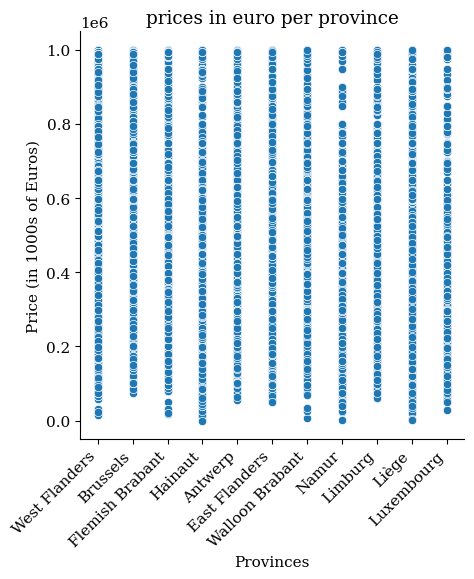

In [77]:
sns.relplot(x="province", y="price", data=cleaned_data, kind="scatter")
plt.xticks(rotation=45, ha="right")
plt.ylabel('Price (in 1000s of Euros)')
plt.xlabel('Provinces')
plt.title("prices in euro per province")
plt.show()

In [78]:
cleaned_sqm = cleaned_data.dropna(subset="total_area_m2")

price = cleaned_sqm["price"].median()
print(price)


324000.0


In [79]:
# clean the data -> romove nan in total_area_m2
cleaned_sqm = cleaned_data.dropna(subset="total_area_m2")

# calculate the price/sqm
cleaned_sqm["price_square"] = cleaned_sqm["price"] / cleaned_sqm["total_area_m2"]

# Group by property type
cleaned_sqm_prop = cleaned_sqm.groupby("property_type")


# mean price in Belgiium. 
mean_price_square = cleaned_sqm_prop["price"].mean().round().astype(int)
# median price in Belgium.
median_price_square = cleaned_sqm_prop["price"].median().round().astype(int)

print(mean_price_square)
print(median_price_square)

property_type
APARTMENT    329817
HOUSE        389798
Name: price, dtype: int64
property_type
APARTMENT    296500
HOUSE        360000
Name: price, dtype: int64


/var/folders/71/3p_b411j49jblf0447_3sy840000gp/T/ipykernel_90554/3289582027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sqm["price_square"] = cleaned_sqm["price"] / cleaned_sqm["total_area_m2"]


In [80]:
# Create a dictionary with the different regions. 
belgium_regions = {
    'Antwerp': 'Flanders',
    'Limburg': 'Flanders',
    'East Flanders': 'Flanders',
    'Flemish Brabant': 'Flanders',
    'West Flanders': 'Flanders',
    'Hainaut': 'Wallonia',
    'Walloon Brabant': 'Wallonia',
    'Namur': 'Wallonia',
    'Liège': 'Wallonia',
    'Luxembourg': 'Wallonia',
    'Brussels': 'Brussels-Capital'
}
# Create a new data set and map it with belgium_regions
cleaned_sqm["region"] = cleaned_sqm["province"].map(belgium_regions)

# Consider only properties between 100k-1000k
filtered_price = cleaned_sqm[(cleaned_sqm["price"] > 100000) & (cleaned_sqm["price"] < 1000000)]


# Use groupby() to group by regions and property type. 
mean_prices = filtered_price.groupby(["region", "property_type"])["price_square"].mean().round().astype(int)
median_prices = filtered_price.groupby(["region", "property_type"])["price_square"].median().round().astype(int)

print(f"Mean price per region: \n{mean_prices}")
print(f"\nMedian per region: \n{median_prices}")

Mean price per region: 
region            property_type
Brussels-Capital  APARTMENT        3941
                  HOUSE            2734
Flanders          APARTMENT        3788
                  HOUSE            2326
Wallonia          APARTMENT        2869
                  HOUSE            1800
Name: price_square, dtype: int64

Median per region: 
region            property_type
Brussels-Capital  APARTMENT        3684
                  HOUSE            2628
Flanders          APARTMENT        3390
                  HOUSE            2265
Wallonia          APARTMENT        2849
                  HOUSE            1733
Name: price_square, dtype: int64


/var/folders/71/3p_b411j49jblf0447_3sy840000gp/T/ipykernel_90554/2798999817.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sqm["region"] = cleaned_sqm["province"].map(belgium_regions)


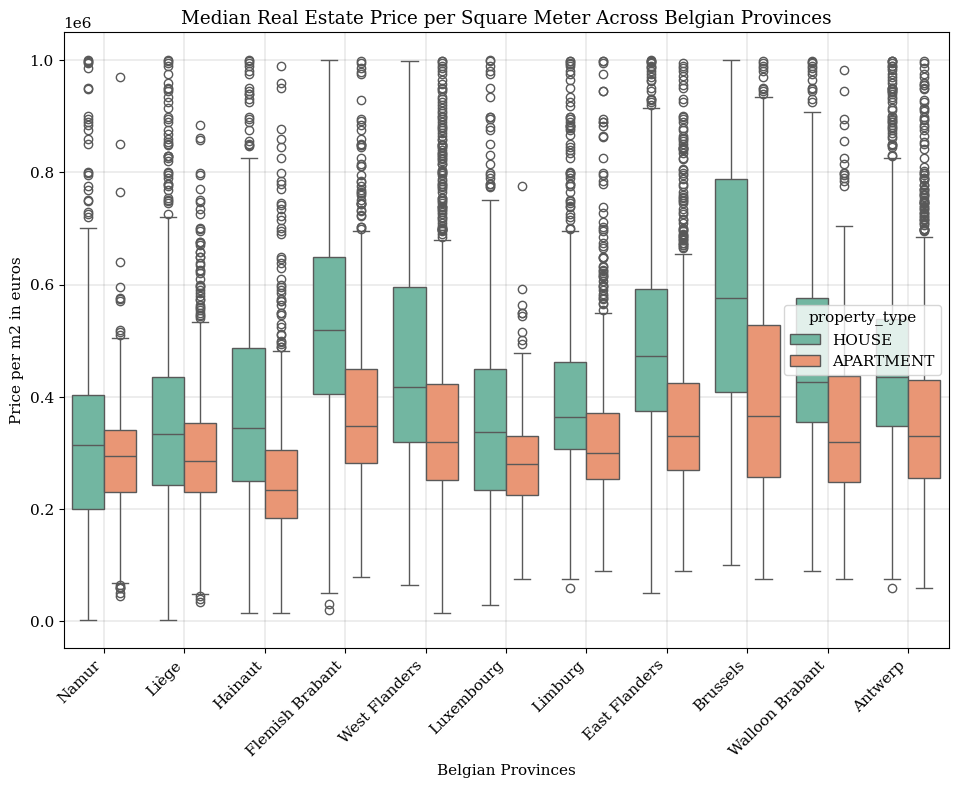

In [81]:
median_province = cleaned_sqm.groupby(["province", "property_type", "price"])["price_square"].mean().reset_index()
sorted_median_province = median_province.sort_values(by="price_square", ascending=True)

plt.rcParams.update({'font.size': 11})
plt.rcParams['font.family'] = 'serif'
plt.figure(figsize=(15, 8))
plot = sns.boxplot(x="province", y="price", hue="property_type", data=sorted_median_province, palette="Set2")
plt.title("Median Real Estate Price per Square Meter Across Belgian Provinces") 
plt.xticks(rotation=45, ha="right")
plt.xlabel("Belgian Provinces")
plt.ylabel("Price per m2 in euros")
# legend = plot._legend
# legend.set_title("Property types")
# legend.texts[0].set_text("Apartment")
# legend.texts[1].set_text("House")
# legend.set_bbox_to_anchor((1.05, 1))
plt.grid(True, which='both', color='black', linewidth=0.1)
plt.subplots_adjust(left=0.2, right=0.79)

plt.show()

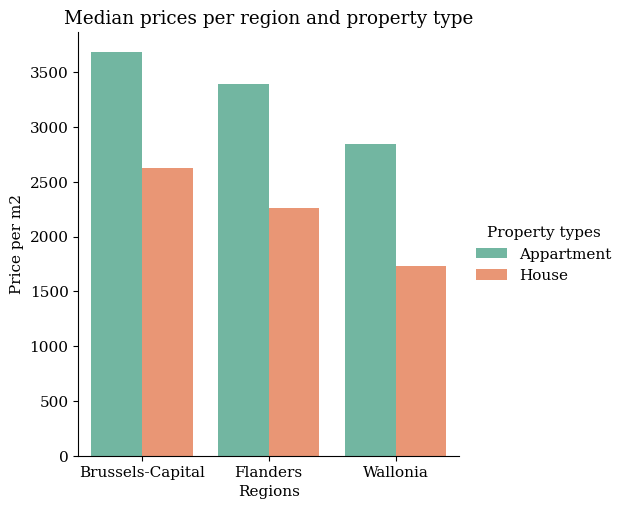

In [82]:
# Need to reset "region" & "property_type" before plotting. Groupby makes a MultiIndex(1 column has 2 variables) of both variables.
# sns takes only a regular column not a MultiIndex!
mean_prices_reset = mean_prices.reset_index()
median_prices_reset = median_prices.reset_index()

# # Create a catplot for the mean 
# plot = sns.catplot(x="region", y="price_square", kind="bar", hue="property_type", data=mean_prices_reset, palette="Set2")
# plt.title("Mean Prices per Region and Property Type")
# plt.xlabel("Regions")
# plt.ylabel("Price per m2")
# legend = plot._legend
# legend.set_title("Property Types")
# legend.texts[0].set_text("Appartment")
# legend.texts[1].set_text("House")
# plt.show()

# Create a catplot for the median
plot = sns.catplot(x="region", y="price_square", kind="bar", hue="property_type", data=median_prices_reset, palette="Set2")
plt.title("Median prices per region and property type")
plt.xlabel("Regions")
plt.ylabel("Price per m2")
legend = plot._legend
legend.set_title("Property types")
legend.texts[0].set_text("Appartment")
legend.texts[1].set_text("House")
plt.savefig('/Users/MimounB/Downloads/Median_per_region', bbox_inches='tight', dpi=1200)
plt.show()

/var/folders/71/3p_b411j49jblf0447_3sy840000gp/T/ipykernel_90554/3423520557.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_sqm["municipalities"] = brussels_houses["zip_code"].map(brussels_zip_codes)


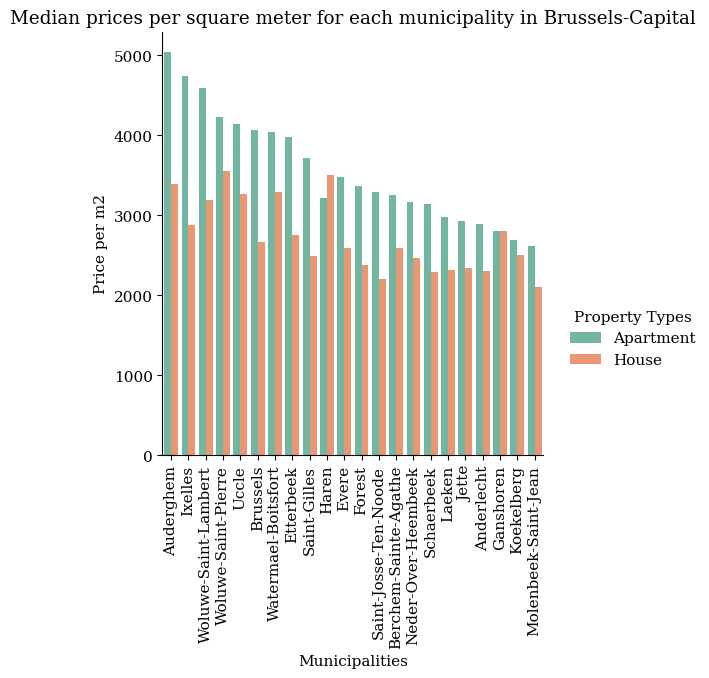

In [106]:
# Map the zip codes with their names. 
brussels_zip_codes = {
    1000: 'Brussels', 1020: 'Laeken', 1030: 'Schaerbeek', 1040: 'Etterbeek', 1050: 'Ixelles',
    1060: 'Saint-Gilles', 1070: 'Anderlecht', 1080: 'Molenbeek-Saint-Jean', 1081: 'Koekelberg', 1082: 'Berchem-Sainte-Agathe', 1083: 'Ganshoren',
    1090: 'Jette', 1120: 'Neder-Over-Heembeek', 1130: 'Haren', 1140: 'Evere', 1150: 'Woluwe-Saint-Pierre',
    1160: 'Auderghem', 1170: 'Watermael-Boitsfort', 1180: 'Uccle', 1190: 'Forest', 1200: 'Woluwe-Saint-Lambert', 1210: 'Saint-Josse-Ten-Noode'
}

# Copy of data, but only bx
brussels_houses = cleaned_sqm[cleaned_sqm['region'] == 'Brussels-Capital'].copy()

cleaned_sqm["municipalities"] = brussels_houses["zip_code"].map(brussels_zip_codes)



# Create two variables to plot the highest/lowest price per sqm in regions, reset them immediatly!
mean_prices_locality = cleaned_sqm.groupby(["region", "property_type", "locality"])["price_square"].mean().reset_index()
median_prices_locality = cleaned_sqm.groupby(["region", "property_type", "locality"])["price_square"].median().reset_index()

# Then, create the median_prices_zip_code DataFrame
median_prices_zip_code = cleaned_sqm.groupby(["region", "property_type", "zip_code", "municipalities"])["price_square"].median().reset_index()

sorted_median_zip = median_prices_zip_code.sort_values(by="price_square", ascending=False)
sorted_median_locality = median_prices_locality.sort_values(by="price_square", ascending=False)



def plot_data_median_zip(region:str):
        
    median_prices_zip_code_brussels = sorted_median_zip[sorted_median_zip["region"] == region]
    plot = sns.catplot(x="municipalities", y="price_square", hue="property_type", kind="bar", data=median_prices_zip_code_brussels, palette="Set2")
    plt.title(f"Median prices per square meter for each municipality in {region}")
    plt.ylabel("Price per m2")
    plt.xlabel("Municipalities")
    legend = plot._legend
    legend.set_title("Property Types")
    legend.texts[0].set_text("Apartment")
    legend.texts[1].set_text("House")
    plt.xticks(rotation=90)
    plt.savefig('/Users/MimounB/Downloads/Median_per_mun_bx', bbox_inches='tight', dpi=1200)
    plt.show()
        
def plot_data_median_loc(region:str):

        median_price_region_flanders = sorted_median_locality[sorted_median_locality["region"] == region]
        plt.figure(figsize=(11, 8))
        plot = sns.catplot(x="locality", y="price_square", hue="property_type", kind="bar", data=median_price_region_flanders, palette="Set2")
        plt.title(f"Median Prices per Square Meter for Each district in {region}")
        plt.ylabel("Price per m2")
        plt.xlabel("Districts")
        legend = plot._legend
        legend.set_title("Property Types")
        legend.texts[0].set_text("Apartment")
        legend.texts[1].set_text("House")
        plt.xticks(rotation=90)
        plt.show()

plot_data_median_zip("Brussels-Capital")
# # plot_data_median_loc("Flanders")
# plot_data_median_loc("Wallonia")


In [84]:
# regions = cleaned_sqm["region"].dropna().unique()
# for region in regions:
#     if region == "Brussels-Capital":
#         # Chart of the mean in Brussels. 
#         mean_prices_zip_code_brussels = mean_prices_zip_code[mean_prices_zip_code["region"] == region]
#         plt.figure(figsize=(11, 8))
#         plot = sns.catplot(x="zip_code", y="price_square", hue="property_type", kind="bar", data=mean_prices_zip_code_brussels, palette="Set2")
#         plt.title(f"Mean Prices per Square Meter for Each Locality in {region}")
#         plt.ylabel("Price per m2")
#         plt.xlabel("Localities")
#         legend = plot._legend
#         legend.set_title("Property Types")
#         legend.texts[0].set_text("Appartment")
#         legend.texts[1].set_text("House")
#         plt.xticks(rotation=90)
#         plt.show()

In [107]:
for region in regions:
        if region != "Brussels-Capital":
            mean_price_region = mean_prices_locality[mean_prices_locality["region"] == region]
            highest_loc = mean_price_region.sort_values(by="price_square", ascending=False).head(2)
            print(f"\n{highest_loc}")
        

highest_loc_bx = median_prices_zip_code.sort_values(by="price_square", ascending=False).head(2)

# Print the localities with the highest price/sqm in each region. 
print(f"\n{highest_loc_bx}")

NameError: name 'regions' is not defined